In [61]:
# importing modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn   # This imports the scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files
from datetime import datetime, timedelta
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from sklearn.tree import DecisionTreeClassifier 
from matplotlib.colors import ListedColormap  

uploaded=files.upload()   # browse and upload dataset.csv
temp = pd.read_csv("Temperature__TuenMun.csv")
temp.max_temp = pd.to_numeric(temp.max_temp, errors='coerce')
temp.min_temp = pd.to_numeric(temp.min_temp, errors='coerce')
temp.mean_temp = pd.to_numeric(temp.mean_temp, errors='coerce')
temp=temp.dropna()
print(temp.head())
print("Data Shape: ",temp.shape)

Saving Temperature__TuenMun.csv to Temperature__TuenMun (24).csv
   year  month  day  max_temp  min_temp  mean_temp
0  2007      1    1      24.4      15.0       18.9
1  2007      1    2      21.3      17.1       19.0
2  2007      1    3      22.1      17.9       19.4
3  2007      1    4      20.8      14.8       16.8
4  2007      1    5      19.8      11.8       15.5
Data Shape:  (5736, 6)


In [70]:
def KNN(day,month,year):
  filter1 = temp[temp['day']==day]
  filter2 = filter1[filter1['month']==month]
  y = filter2.iloc[:,[3,4,5]].values
  x = filter2.iloc[:,[0]].values

  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  st_x= StandardScaler()  
  x_train= st_x.fit_transform(x_train)    
  x_test= st_x.transform(x_test)   
  classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
  classifier.fit(x_train, y_train)
  y_pred= classifier.predict(x_test)

  x_set, y_set = x_train, y_train  
  x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
  np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

  plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
  alpha = 0.75, cmap = ListedColormap(('purple','green' )))

  plt.xlim(x1.min(), x1.max())  
  plt.ylim(x2.min(), x2.max())  
  for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)  
    plt.title('Decision Tree Algorithm (Training set)')  
    plt.xlabel('Age')  
    plt.ylabel('Estimated Salary')  
    plt.legend()  
    plt.show()

In [42]:
def LR(day,month,year):
  filter1 = temp[temp['day']==day]
  filter2 = filter1[filter1['month']==month]
  y_max = filter2.iloc[:,[3]].values
  y_min = filter2.iloc[:,[4]].values
  y_mean = filter2.iloc[:,[5]].values
  X = filter2.iloc[:,[0]].values

  model = LinearRegression(fit_intercept=True)
  X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
  lr_max = LinearRegression().fit(X, y_max)
  lr_min = LinearRegression().fit(X, y_min)
  lr_mean = LinearRegression().fit(X, y_mean)
  y_fit_max = lr_max.predict(X_fit)
  y_fit_min = lr_min.predict(X_fit)
  y_fit_mean = lr_mean.predict(X_fit)

  model.fit(X_fit, y_fit_max)
  y_pred_max = model.predict([[year]])
  model.fit(X_fit, y_fit_min)
  y_pred_min = model.predict([[year]])
  model.fit(X_fit, y_fit_mean)
  y_pred_mean = model.predict([[year]])
  return([str(year)+'-'+str(month)+'-'+f"{day:02d}",y_pred_max.item(0),y_pred_min.item(0),y_pred_mean.item(0)])

In [43]:
def NLR(day,month,year,degree):
  filter1 = temp[temp['day']==day]
  filter2 = filter1[filter1['month']==month]
  y_max = filter2.iloc[:,[3]].values
  y_min = filter2.iloc[:,[4]].values
  y_mean = filter2.iloc[:,[5]].values
  X = filter2.iloc[:,[0]].values

  model = LinearRegression(fit_intercept=True)
  X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
  logistic = PolynomialFeatures(degree=degree)
  X_logistic = logistic.fit_transform(X)
  regr_max = LinearRegression().fit(X_logistic, y_max)
  y_fit_max = regr_max.predict(logistic.fit_transform(X_fit))
  regr_min = LinearRegression().fit(X_logistic, y_min)
  y_fit_min = regr_min.predict(logistic.fit_transform(X_fit))
  regr_mean = LinearRegression().fit(X_logistic, y_mean)
  y_fit_mean = regr_mean.predict(logistic.fit_transform(X_fit))

  model.fit(X_fit, y_fit_max)
  y_pred_max = model.predict([[year]])
  model.fit(X_fit, y_fit_min)
  y_pred_min = model.predict([[year]])
  model.fit(X_fit, y_fit_mean)
  y_pred_mean = model.predict([[year]])
  return([str(year)+'-'+str(month)+'-'+f"{day:02d}",y_pred_max.item(0),y_pred_min.item(0),y_pred_mean.item(0)])

In [44]:
def DTR(day,month,year,depth):
  filter1 = temp[temp['day']==day]
  filter2 = filter1[filter1['month']==month]
  y_max = filter2.iloc[:,[3]].values
  y_min = filter2.iloc[:,[4]].values
  y_mean = filter2.iloc[:,[5]].values
  X = filter2.iloc[:,[0]].values

  tree_max = DecisionTreeRegressor(max_depth=depth)
  tree_max.fit(X, y_max)
  tree_min = DecisionTreeRegressor(max_depth=depth)
  tree_min.fit(X, y_min)
  tree_mean = DecisionTreeRegressor(max_depth=depth)
  tree_mean.fit(X, y_mean)
  sort_index = X.flatten().argsort()

  y_pred_max = tree_max.predict([[year]])
  y_pred_min = tree_min.predict([[year]])
  y_pred_mean = tree_mean.predict([[year]])
  return([str(year)+'-'+str(month)+'-'+f"{day:02d}",y_pred_max.item(0),y_pred_min.item(0),y_pred_mean.item(0)])

In [45]:
import requests
import json
response_API = requests.get('https://data.weather.gov.hk/weatherAPI/opendata/weather.php?dataType=fnd')
data = response_API.text
parse_json = json.loads(data)
HKO_weather_forecast = pd.DataFrame(columns=['Date','Max Temp','Min Temp'],index=[i for i in range(1,10)])
for i in range(9): 
  HKO_weather_forecast.loc[i+1] = [parse_json['weatherForecast'][i]['forecastDate'],
                    parse_json['weatherForecast'][i]['forecastMaxtemp']['value'],parse_json['weatherForecast'][i]['forecastMintemp']['value']]
print(HKO_weather_forecast)

       Date Max Temp Min Temp
1  20221106       21       19
2  20221107       23       20
3  20221108       25       21
4  20221109       26       22
5  20221110       26       22
6  20221111       26       22
7  20221112       27       22
8  20221113       26       21
9  20221114       25       21


Linear Regression:
         Date   Max Temp   Min Temp  Mean Temp
1  2022-11-07  28.421905  21.307619  24.605714
2  2022-11-08  27.224762  21.398095  23.257143
3  2022-11-09  26.599048  19.267619  22.291429
4  2022-11-10  24.217143  20.039048  21.582857
5  2022-11-11  26.013333  19.827619  22.506667
6  2022-11-12  25.645714  20.913333  22.865714
7  2022-11-13  25.094556  21.096615  22.818956
8  2022-11-14  26.443103  21.204118  23.114358
9  2022-11-15  26.520339  21.480846  23.253456


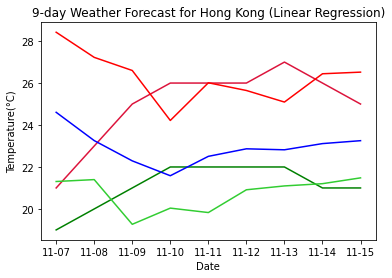

In [65]:
weather_forecast = pd.DataFrame(columns=['Date','Max Temp','Min Temp','Mean Temp'],index=[i for i in range(1,10)])
dates = []
for i in range(1,10):
  today = datetime.now() + timedelta(days = i)
  weather_forecast.loc[i] = LR(today.day, today.month, today.year)
  dates.append(str(today.month)+'-'+f"{today.day:02d}")

print('Linear Regression:')
print(weather_forecast)
plt.title("9-day Weather Forecast for Hong Kong (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")
plt.plot(dates, HKO_weather_forecast['Max Temp'],color='crimson')
plt.plot(dates, HKO_weather_forecast['Min Temp'],color='green')
plt.plot(dates, weather_forecast['Max Temp'],color='red')
plt.plot(dates, weather_forecast['Min Temp'],color='limegreen')
plt.plot(dates, weather_forecast['Mean Temp'],color='blue')
plt.show()
print()

Non Linear Regression:
         Date   Max Temp   Min Temp  Mean Temp
1  2022-11-07  27.929966   20.85399  24.162056
2  2022-11-08   27.70827  22.257206   24.05038
3  2022-11-09  27.355081  19.856813  23.061696
4  2022-11-10  24.391128  20.728576   22.09535
5  2022-11-11  26.097795  20.665761   23.06009
6  2022-11-12  25.283502  22.003351   23.28044
7  2022-11-13   24.95822  22.130718    23.3122
8  2022-11-14  27.364588  22.053836  23.929968
9  2022-11-15   27.23607  22.194045  24.139151


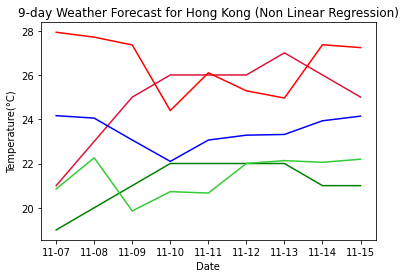

In [66]:
weather_forecast = pd.DataFrame(columns=['Date','Max Temp','Min Temp','Mean Temp'],index=[i for i in range(1,10)])
for i in range(1,10):
  today = datetime.now() + timedelta(days = i)
  weather_forecast.loc[i] = NLR(today.day, today.month, today.year, 3)
print('Non Linear Regression:')
print(weather_forecast)
plt.title("9-day Weather Forecast for Hong Kong (Non Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")
plt.plot(dates, HKO_weather_forecast['Max Temp'],color='crimson')
plt.plot(dates, HKO_weather_forecast['Min Temp'],color='green')
plt.plot(dates, weather_forecast['Max Temp'],color='red')
plt.plot(dates, weather_forecast['Min Temp'],color='limegreen')
plt.plot(dates, weather_forecast['Mean Temp'],color='blue')
plt.show()
print()

Decision Tree:
         Date Max Temp Min Temp Mean Temp
1  2022-11-07     29.2     23.3      25.9
2  2022-11-08     24.8     16.5      18.9
3  2022-11-09     23.7     15.9      18.9
4  2022-11-10     24.6     17.3      19.8
5  2022-11-11     25.0     17.4      20.9
6  2022-11-12     26.7     18.5      22.1
7  2022-11-13     25.7     19.1      21.5
8  2022-11-14     26.2     17.9      21.1
9  2022-11-15     25.6     18.8      21.1


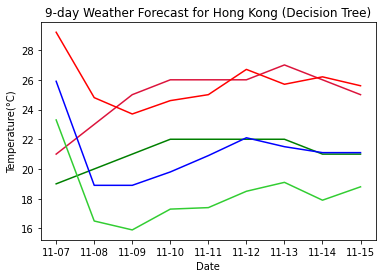

In [67]:
weather_forecast = pd.DataFrame(columns=['Date','Max Temp','Min Temp','Mean Temp'],index=[i for i in range(1,10)])
for i in range(1,10):
  today = datetime.now() + timedelta(days = i)
  weather_forecast.loc[i] = DT(today.day, today.month, today.year, 6)
print('Decision Tree:')
print(weather_forecast)
plt.title("9-day Weather Forecast for Hong Kong (Decision Tree)")
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")
plt.plot(dates, HKO_weather_forecast['Max Temp'],color='crimson')
plt.plot(dates, HKO_weather_forecast['Min Temp'],color='green')
plt.plot(dates, weather_forecast['Max Temp'],color='red')
plt.plot(dates, weather_forecast['Min Temp'],color='limegreen')
plt.plot(dates, weather_forecast['Mean Temp'],color='blue')
plt.show()
print()